# Classificació de cel·lules usant la U-Net

**TODO: Descripcio**

*La següent cel·la s'ha d'executar sempre*

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd gdrive/My Drive/u_net_folder

/content/gdrive/My Drive/u_net_folder


In [ ]:
!git clone https://github.com/bmalcover/u_cells

[Errno 2] No such file or directory: 'gdrive/My Drive/u_net_folder'
/content/gdrive/My Drive/u_net_folder
Cloning into 'u_cells'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 11 (delta 2), reused 7 (delta 1), pack-reused 0
Unpacking objects: 100% (11/11), done.


**DATA**

Només executar si dins la carpeta *u_net_folder* no hi ha la carpeta *unet_color_quatre*

In [ ]:
#!wget -O dataset.zip https://www.dropbox.com/s/3zfz89hik6989h5/dataset.zip?dl=1
!wget -O dataset_four.zip https://www.dropbox.com/s/0v6rdf3xhoge0vh/unet_color_quatre.zip?dl=1 
#!wget -O dataset_gt.zip https://www.dropbox.com/s/wvjlpqykck6jwc6/unet_color_tres.zip?dl=1
#!wget -O dataset_gros.zip https://www.dropbox.com/s/e7ndtiqce74gqli/sub.zip?dl=1
 
#!unzip dataset.zip
!unzip dataset_four.zip > /dev/null
#!unzip dataset_gt.zip
#!unzip dataset_gros.zip

--2020-12-09 11:35:10--  https://www.dropbox.com/s/0v6rdf3xhoge0vh/unet_color_quatre.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/0v6rdf3xhoge0vh/unet_color_quatre.zip [following]
--2020-12-09 11:35:10--  https://www.dropbox.com/s/dl/0v6rdf3xhoge0vh/unet_color_quatre.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce37c7c251fef159ad9a22b9d59.dl.dropboxusercontent.com/cd/0/get/BEtg1cMIC8ypIUA2LDWHmEpgzuHKbPPhb20HCCXE-WUI53GkoTWdz4j-o9ofOmahA1UnxMrYUV8_NYI-K3b81KfXHM1LG4aP2sxQ6_hBHMcfs6Q4E-DtdXlwGUGGI9ZpH7k/file?dl=1# [following]
--2020-12-09 11:35:11--  https://uce37c7c251fef159ad9a22b9d59.dl.dropboxusercontent.com/cd/0/get/BEtg1cMIC8ypIUA2LDWHmEpgzuHKbPPhb20HCCXE-WUI53GkoTWdz4j-o9ofOmahA1UnxMrYUV8_NYI-K3b81

Llibreries

In [ ]:
# %tensorflow_version 1.x
import io
from datetime import datetime

from matplotlib import pyplot as plt

from numpy.random import seed
import tensorflow as tf
from tensorflow.keras import metrics
import keras
import keras.backend as K
from PIL import Image


import numpy as np
import cv2

seed(1)
#print(tf.__version__)

Funcionalitats propies



In [ ]:
%cd u_cells/

from model import *
from data import *

%cd ..

/content/gdrive/My Drive/u_net_folder/u_cells
/content/gdrive/My Drive/u_net_folder


### Preparació de les dades i generació de la xarxa
---

In [ ]:
test_path_root = "./unet_color_quatre/test/image/"
test_path = test_path_root + "*.png"
train_path = './unet_color_quatre/train'
generator_path = None #'./generator5/'
tb_dir = "./log/" + datetime.now().strftime("%Y/%m/%d-%H:%M:%S")
# tb_cb = keras.callbacks.TensorBoard(tb_dir, write_graph=True, update_freq=10)

data_gen_args = dict(rotation_range=0.2,
						width_shift_range=0.05,
						height_shift_range=0.05,
						shear_range=0.05,
						zoom_range=0.05,
						horizontal_flip=True,
						fill_mode='nearest')

myGene = trainGenerator(2, train_path,'image','label',data_gen_args,save_to_dir = generator_path, mask_color_mode = "rgb", decode_flag=True, target_size=(512,512)) #AQui

model = get_small_unet(n_filters=64, bn = True, input_size=(512,512,1), output_channels = 3, loss_func = dice_coef_loss) ### AqUI!!!!!
# model_checkpoint = ModelCheckpoint('unet_membrane.hdf5', monitor='loss',verbose=1, save_best_only=True)
#tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)



Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 512, 512, 1) 0                                            
__________________________________________________________________________________________________
conv2d_38 (Conv2D)              (None, 512, 512, 64) 640         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_36 (BatchNo (None, 512, 512, 64) 256         conv2d_38[0][0]                  
__________________________________________________________________________________________________
conv2d_39 (Conv2D)              (None, 512, 512, 64) 36928       batch_normalization_36[0][0]     
_______________________________________________________________________________________

### Entrenament
---

In [ ]:
model.fit(myGene, steps_per_epoch=300, epochs=10) # 300, 5

Found 33 images belonging to 1 classes.
Found 33 images belonging to 1 classes.
Epoch 1/10
300/300 [==============================] - 144s 481ms/step - loss: 0.2334 - categorical_accuracy: 0.4383
Epoch 2/10
300/300 [==============================] - 144s 481ms/step - loss: 0.2208 - categorical_accuracy: 0.4073
Epoch 3/10
300/300 [==============================] - 145s 482ms/step - loss: 0.2176 - categorical_accuracy: 0.4058
Epoch 4/10
300/300 [==============================] - 144s 480ms/step - loss: 0.2163 - categorical_accuracy: 0.3942
Epoch 5/10
300/300 [==============================] - 141s 471ms/step - loss: 0.2157 - categorical_accuracy: 0.3940
Epoch 6/10
300/300 [==============================] - 145s 483ms/step - loss: 0.2149 - categorical_accuracy: 0.4069
Epoch 7/10
300/300 [==============================] - 144s 481ms/step - loss: 0.2145 - categorical_accuracy: 0.4095
Epoch 8/10
300/300 [==============================] - 145s 483ms/step - loss: 0.2136 - categorical_accuracy:

### Resultats - avaluació
---


In [ ]:
testGene = testGenerator(test_path, target_size=(512, 512))
results = model.predict(testGene, 16)

In [ ]:
def get_iou(ground, prediction, th, debug=False):
  assert ground.shape[2] == prediction.shape[2]
  
  ground = ground.astype(np.float32) / ground.max()
  ious = [0] * ground.shape[2]
  
  if debug:
    fig = plt.figure(1,(16, 12))
    idx = 1

  for channel_idx in range(0, ground.shape[2]):

    channel_gt = ground[:,:, 2-channel_idx] # Arreglar o almanco esbrinar
    channel_pred = np.copy(prediction[:, :, channel_idx])
    
    channel_pred = cv2.resize(channel_pred, (channel_gt.shape[1], channel_gt.shape[0]), interpolation = cv2.INTER_NEAREST) 

    channel_pred[channel_pred <= th] = 0
    channel_pred[channel_pred > th] = 1
 
    intersection = cv2.bitwise_and(channel_gt, channel_pred)
    intersection_area = np.count_nonzero(intersection)
    
    union = cv2.bitwise_or(channel_gt, channel_pred)
    union_area = np.count_nonzero(union)
    
    if debug:
      l = []
      l.append(channel_gt)
      l.append(channel_pred)
      l.append(intersection)
      l.append(union)
    
      for i in range(len(l)):
        plt.subplot(3,4, idx)
        plt.imshow(l[i], cmap="gray");
        idx += 1
    
    ious[channel_idx] += round(intersection_area / union_area, 3)
    
  return ious

In [ ]:
alpha = 0.5

ious = []
for idx, res in enumerate(results):
  gt_image = cv2.imread("./unet_color_quatre/test/label/" + str(idx) + ".png")

  gt_image = decode(gt_image)

  iou = get_iou(gt_image, res, alpha)
  ious.append(iou)

  if idx < 10:
    print("Image 0"+ str(idx) + ": " + str(iou))
  else:
    print("Image "+ str(idx) + ": " + str(iou))

print("###########################################")
print("Mean: ", np.mean(ious, axis = 0))

Image 00: [0.143, 0.764, 0.62]
Image 01: [0.062, 0.609, 0.588]
Image 02: [0.001, 0.793, 0.64]
Image 03: [0.179, 0.719, 0.408]
Image 04: [0.096, 0.66, 0.577]
Image 05: [0.0, 0.71, 0.532]
Image 06: [0.255, 0.762, 0.602]
Image 07: [0.022, 0.718, 0.514]
Image 08: [0.21, 0.751, 0.472]
Image 09: [0.096, 0.77, 0.643]
Image 10: [0.1, 0.616, 0.617]
Image 11: [0.439, 0.78, 0.707]
Image 12: [0.078, 0.701, 0.676]
Image 13: [0.0, 0.825, 0.764]
Image 14: [0.0, 0.801, 0.741]
Image 15: [0.166, 0.681, 0.607]
Image 16: [0.231, 0.77, 0.496]
###########################################
Mean:  [0.12223529 0.73117647 0.60023529]


La següent cel·la només serveix per evaluar el funcionament de _get_iou_

[0.179, 0.719, 0.408]

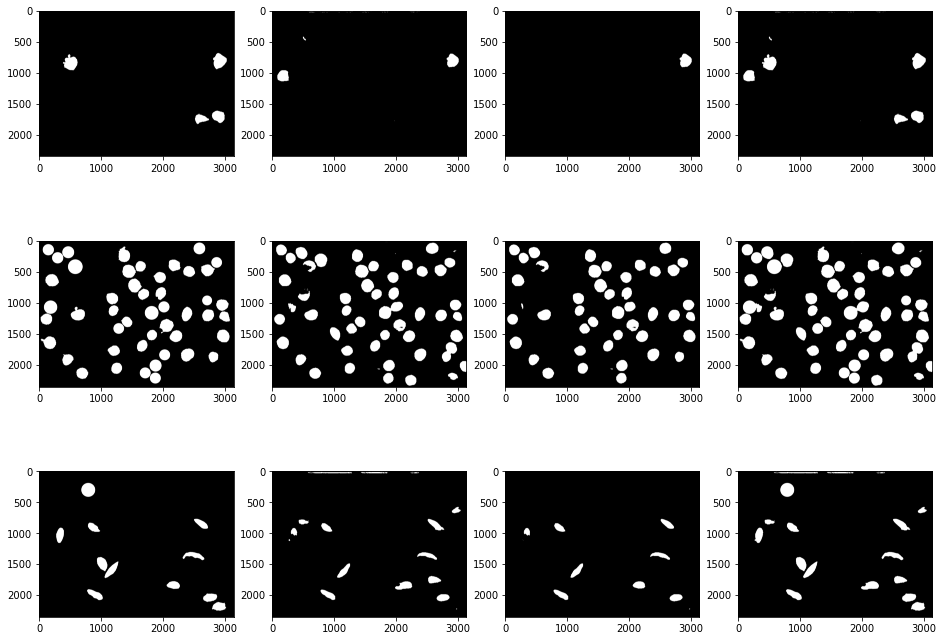

In [ ]:
index = 3

ground = cv2.imread("./unet_color_quatre/test/label/" + str(index) + ".png")
prediction = results[index]
th = 0.5
ground = decode(ground)
get_iou(ground, prediction, th, True)

<tf.Tensor: shape=(512, 512), dtype=float32, numpy=
array([[0.2901783 , 0.25066376, 0.25683862, ..., 0.259856  , 0.25302732,
        0.26661026],
       [0.2590446 , 0.25784487, 0.25822932, ..., 0.28247362, 0.27092224,
        0.25010252],
       [0.25644386, 0.25103402, 0.26420456, ..., 0.25117522, 0.2762618 ,
        0.27000624],
       ...,
       [0.25123507, 0.25220156, 0.25000572, ..., 0.25504214, 0.25695634,
        0.25577474],
       [0.25040966, 0.2678269 , 0.25390172, ..., 0.25103194, 0.25804448,
        0.2604429 ],
       [0.2616759 , 0.25364882, 0.26374823, ..., 0.2500791 , 0.25137514,
        0.25502473]], dtype=float32)>

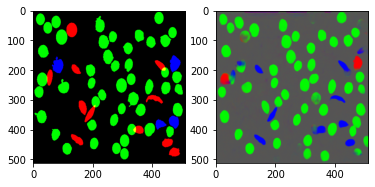

In [ ]:
#BRUTOR
index = 3
ground = cv2.imread("./unet_color_quatre/test/label/" + str(index) + ".png")
ground = decode(ground)

ground = cv2.resize(ground, (512, 512), interpolation = cv2.INTER_NEAREST) 
prediction = results[index]

g = K.constant(ground)
p = K.constant(prediction)
        # y_true, y_pred

plt.subplot(1,2, 1)
plt.imshow(ground, cmap="gray");
plt.subplot(1,2, 2)
plt.imshow(prediction, cmap="gray");

dice_coef_loss(g, p)


Visualització dels resultats en format *RAW*

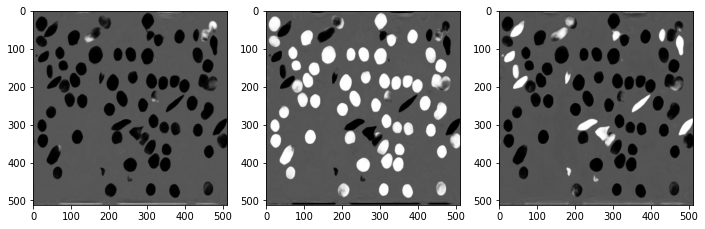

In [ ]:
res = results[6] # Canviar aquest index per veure diferents imatges

fig = plt.figure(1,(16,12))
dim = res.shape[2]
for i in range(dim):
  plt.subplot(1, dim, i+1)
  plt.imshow(res[:,:,i], cmap="gray");

Guardar resultats en una carpeta anomenada Out

*Nota: Es sobreescriuen els resultats anteriors*

In [ ]:
**import os

!rm -rf out/
!mkdir out

for idx, r in enumerate(results):
  for c_idx in range(0, r.shape[2]):
    path = "./out/" + str(c_idx) + "/"
    if not os.path.exists(path): 
      os.makedirs(path)

    cv2.imwrite(path + str(idx) + ".png", r[:,:,c_idx]*255)

In [ ]:
from google.colab import files

!zip -r ./out.zip ./out > /dev/null
files.download("./out.zip");

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>